In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/balance_16c/report.tsv"

tool_pretty_names = {
    "cooler_cooler": "cooler",
    "hictk_cooler": "hictk (cooler)",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df1 = df.groupby(["tool", "resolution"])["time"].median().reset_index()

cooler_runtime = df1.loc[df1["tool"] == "cooler", "time"].to_numpy()
hictk_cooler_runtime = df1.loc[df1["tool"] == "hictk (cooler)", "time"].to_numpy()

df1 = df.groupby(["tool", "resolution"])["memory"].median().reset_index()

cooler_memory = df1.loc[df1["tool"] == "cooler", "memory"].to_numpy()
hictk_cooler_memory = df1.loc[df1["tool"] == "hictk (cooler)", "memory"].to_numpy()

df

,tool,format,resolution,cpus,time,memory,time_min,memory_gb,resolution_pretty
0,cooler,cooler,10,16,109435.33,84847760,1823.922167,84.847760,10
26,cooler,cooler,10,16,120109.08,84847800,2001.818000,84.847800,10
52,cooler,cooler,10,16,120553.18,84849540,2009.219667,84.849540,10
13,hictk (cooler),cooler,10,16,2330.38,17002740,38.839667,17.002740,10
39,hictk (cooler),cooler,10,16,2247.59,17035032,37.459833,17.035032,10
...,...,...,...,...,...,...,...,...,...
34,cooler,cooler,2500000,16,3.70,98856,0.061667,0.098856,2.5M
60,cooler,cooler,2500000,16,3.90,98744,0.065000,0.098744,2.5M
21,hictk (cooler),cooler,2500000,16,0.90,69088,0.015000,0.069088,2.5M
47,hictk (cooler),cooler,2500000,16,0.90,69008,0.015000,0.069008,2.5M


In [5]:
cooler_runtime / hictk_cooler_runtime,

(array([51.54055562,  6.10093393,  1.64826145,  1.29442726,  0.84858811,
         0.77934138,  1.00212374,  1.09102706,  1.18450704,  1.71319474,
         2.54491463,  3.20242915,  4.15555556]),)

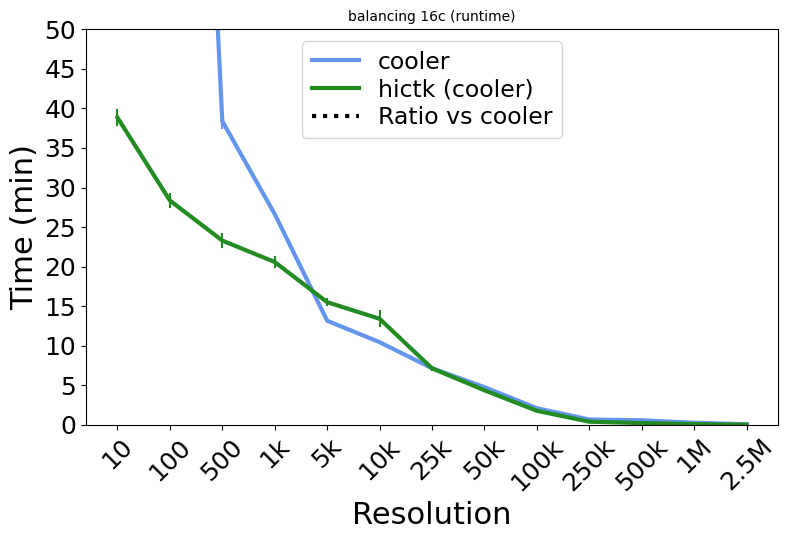

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=True,
)


ax.set(title="balancing 16c (runtime)", ylabel="Time (min)", xlabel="Resolution")

ax.set(ylim=(0, 50))

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
    loc="upper center",
)

loc = plticker.MultipleLocator(base=5)
ax.yaxis.set_major_locator(loc)


fig.tight_layout()
fig.savefig("/tmp/balance_16c_runtime.png", dpi=600)
fig.savefig("/tmp/balance_16c_runtime.svg")

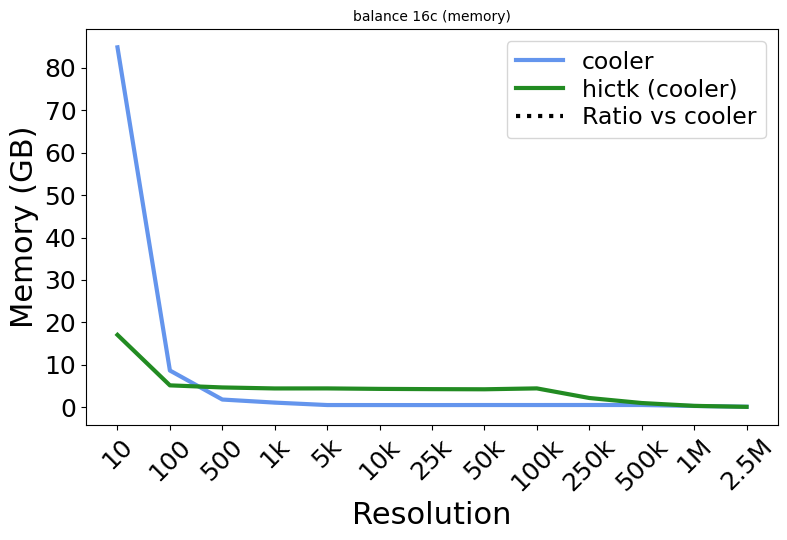

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax.set(title="balance 16c (memory)", ylabel="Memory (GB)", xlabel="Resolution")

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=10)
ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/balance_16c_memory.png", dpi=600)
fig.savefig("/tmp/balance_16c_memory.svg")